In [2]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Create the data for the table
data = {
    'File input': [
        'eGFJAG-2jM8_transformed.json', 'EMBw_kXc574_transformed.json',
        'VUPKfQgXy8g_transformed.json', 'an7MXASRyI0_transformed.json'
    ],
    'GameScore (T1-T2)': ['3-6', '6-4', '3-6', '6-4'],
    '1Point': [0.48819, 0.51903, 0.39074, 0.48729],
    'Tiebreak PAT': [0.37489, 0.544235, 0.1723, 0.526075],
    'Tiebreak Python': [0.464, 0.565, 0.163, 0.488],
    'FullGame': [0.381, 0.701, 0.011, 0.686]
}


/Users/guanzhou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/guanzhou/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [10]:
game_data_df = pd.DataFrame(data)

# Split the GameScore for sorting purposes
game_data_df[['Team1_Score', 'Team2_Score']] = game_data_df['GameScore (T1-T2)'].str.split('-', expand=True).astype(float)

# Sort by GameScore
sorted_game_data_df = game_data_df.sort_values(by=['Team1_Score', 'Team2_Score']).drop(columns=['Team1_Score', 'Team2_Score'])
sorted_game_data_df.index.name = 'Match No.'
# Adjust pandas settings to show all columns in one line and format better
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to the next line
pd.set_option('display.colheader_justify', 'left')  # Adjust column alignment to the left

# Display sorted data
print(sorted_game_data_df)

          File input                    GameScore (T1-T2)  1Point   Tiebreak PAT  Tiebreak Python  FullGame
Match No.                                                                                                  
0          eGFJAG-2jM8_transformed.json  3-6               0.48819  0.374890      0.464            0.381   
2          VUPKfQgXy8g_transformed.json  3-6               0.39074  0.172300      0.163            0.011   
1          EMBw_kXc574_transformed.json  6-4               0.51903  0.544235      0.565            0.701   
3          an7MXASRyI0_transformed.json  6-4               0.48729  0.526075      0.488            0.686   


In [11]:

# Convert the data into a pandas DataFrame
game_data_df = pd.DataFrame(data)

# Split the GameScore for sorting purposes
game_data_df[['Team1_Score', 'Team2_Score']] = game_data_df['GameScore (T1-T2)'].str.split('-', expand=True).astype(float)

# Sort by GameScore
# sorted_game_data_df = game_data_df.sort_values(by=['Team1_Score', 'Team2_Score']).drop(columns=['Team1_Score', 'Team2_Score'])

# Display sorted data
print(game_data_df)


  File input                    GameScore (T1-T2)  1Point   Tiebreak PAT  Tiebreak Python  FullGame  Team1_Score  Team2_Score
0  eGFJAG-2jM8_transformed.json  3-6               0.48819  0.374890      0.464            0.381     3.0          6.0        
1  EMBw_kXc574_transformed.json  6-4               0.51903  0.544235      0.565            0.701     6.0          4.0        
2  VUPKfQgXy8g_transformed.json  3-6               0.39074  0.172300      0.163            0.011     3.0          6.0        
3  an7MXASRyI0_transformed.json  6-4               0.48729  0.526075      0.488            0.686     6.0          4.0        


In [12]:
# Probability of reaching n bernollli trials successes before n failures, with success probability p
def win_probability(n, p):
    # Let dp[i][j] be the probability that we win (n successes before n failures) given that current state is i successes, j failures
    # dp[i][j] = p * dp[i+1][j] + (1-p) * dp[i][j+1] (value of current node is weighted sum of successor nodes)
    dp = [[0.0 for _ in range(n + 1)] for _ in range(n + 1)]
    
    # Base cases
    for j in range(n):
        dp[n][j] = 1.0  # If we reach n points, we win
    for i in range(n):
        dp[i][n] = 0.0  # If opponent reaches 10 points, we lose

    for i in range(n - 1, -1, -1):  # Your points
        for j in range(n - 1, -1, -1):  # Opponent's points
            dp[i][j] = p * dp[i + 1][j] + (1-p) * dp[i][j + 1]
    
    return dp[0][0]

probability = win_probability(10, 0.3)
print(f"Probability that we win the game: {probability:.4f}")

Probability that we win the game: 0.0326


In [13]:
# from simulation import *

# data = []
# for P1_serve_win in range(1, 100, 5):
#     for P2_serve_win in range(1, 100, 5):
#         for P3_serve_win in range(1, 100, 5):
#             for P4_serve_win in range(1, 100, 5):
#                 P1_prob = P1_serve_win / 100
#                 P2_prob = P2_serve_win / 100
#                 P3_prob = P3_serve_win / 100
#                 P4_prob = P4_serve_win / 100
                
#                 # Simulate probabilities
#                 true_probability = simulate_full_match(P1_prob, P2_prob, P3_prob, P4_prob)
#                 one_point = simulate(P1_prob, P2_prob, P3_prob, P4_prob, points_to_win=1)
#                 seven_point = simulate(P1_prob, P2_prob, P3_prob, P4_prob, points_to_win=7)
#                 # store data in df
#                 data.append({
#                     'P1 Serve Win': P1_prob,
#                     'P2 Serve Win': P2_prob,
#                     'P3 Serve Win': P3_prob,
#                     'P4 Serve Win': P4_prob,
#                     'True Probability': true_probability,
#                     'One Point Output': one_point,
#                     'Seven Point Output': seven_point
#                 })
# df = pd.DataFrame(data)

# # investigate how different P1_serve_win to P4_serve_win affects winning probability
# # df['One Point Difference'] = df['One Point Output'] - df['True Probability']
# # df['Seven Point Difference'] = df['Seven Point Output'] - df['True Probability']

# # Plot the differences
# plt.figure(figsize=(10, 5))
# plt.plot(df.index, df['True Probability'], marker='o', label='True Probability')
# plt.plot(df.index, df['One Point Output'], marker='x', label='One Point Output')
# plt.plot(df.index, df['Seven Point Output'], marker='s', label='Seven Point Output')
# plt.xlabel('Index')
# plt.ylabel('Probability')
# plt.title('True Probability vs One Point and Seven Point Outputs')
# plt.legend()
# plt.show()

# # Display the DataFrame
# df.head()

In [14]:
# df['One Point Difference'] = df['One Point Output'] - df['True Probability']
# df['Seven Point Difference'] = df['Seven Point Output'] - df['True Probability']

# df.head()

In [15]:
# df.plot()

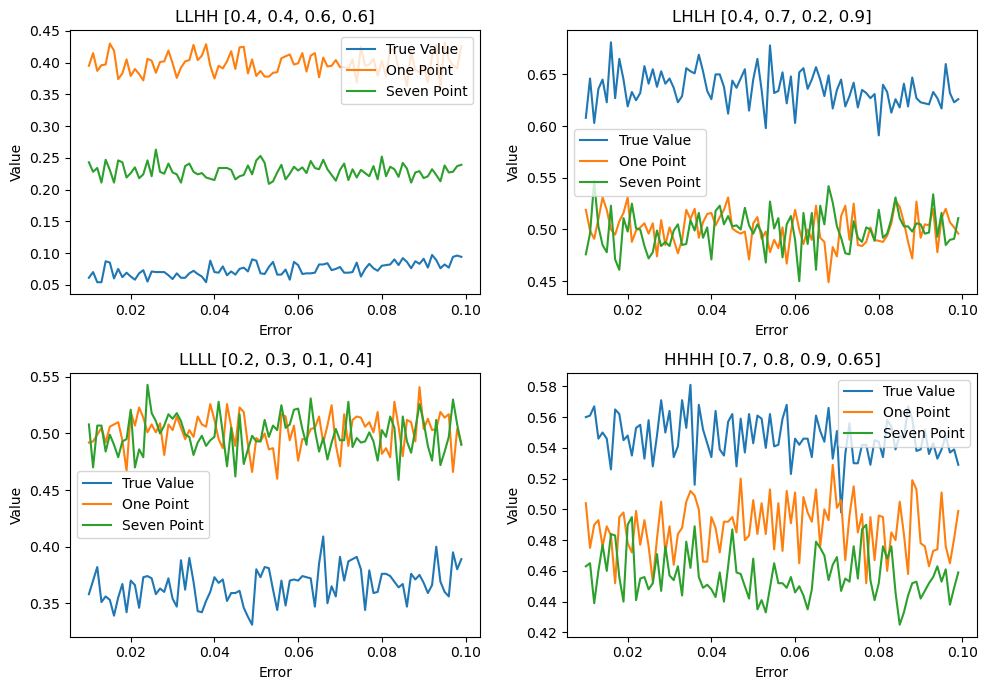

In [3]:
from simulation import simulate_full_match, simulate
lo_lo_hi_hi = [0.4, 0.4, 0.6, 0.6]
lo_hi_lo_hi = [0.4, 0.7, 0.2, 0.9]
lo_lo_lo_lo = [0.2, 0.3, 0.1, 0.4]
hi_hi_hi_hi = [0.7, 0.8, 0.9, 0.65]

errors = [error / 1000 for error in range(10, 100)]
true_values_llhh = []
one_point_llhh = []
seven_point_llhh = []

true_values_lhlh = []
one_point_lhlh = []
seven_point_lhlh = []

true_values_llll = []
one_point_llll = []
seven_point_llll = []

true_values_hhhh = []
one_point_hhhh = []
seven_point_hhhh = []

for err in errors:
    true_values_llhh.append(simulate_full_match(*lo_lo_hi_hi, error=err))
    one_point_llhh.append(simulate(*lo_lo_hi_hi, points_to_win=1, error=err))
    seven_point_llhh.append(simulate(*lo_lo_hi_hi, error=err))

    true_values_lhlh.append(simulate_full_match(*lo_hi_lo_hi, error=err))
    one_point_lhlh.append(simulate(*lo_hi_lo_hi, error=err, points_to_win=1))
    seven_point_lhlh.append(simulate(*lo_hi_lo_hi, error=err))

    true_values_llll.append(simulate_full_match(*lo_lo_lo_lo, error=err))
    one_point_llll.append(simulate(*lo_lo_lo_lo, error=err, points_to_win=1))
    seven_point_llll.append(simulate(*lo_lo_lo_lo, error=err))

    true_values_hhhh.append(simulate_full_match(*hi_hi_hi_hi, error=err))
    one_point_hhhh.append(simulate(*hi_hi_hi_hi, error=err, points_to_win=1))
    seven_point_hhhh.append(simulate(*hi_hi_hi_hi, error=err))
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.plot(errors, true_values_llhh, label='True Value')
plt.plot(errors, one_point_llhh, label='One Point')
plt.plot(errors, seven_point_llhh, label='Seven Point')
plt.title(f'LLHH {lo_lo_hi_hi}')
plt.xlabel('Error')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(errors, true_values_lhlh, label='True Value')
plt.plot(errors, one_point_lhlh, label='One Point')
plt.plot(errors, seven_point_lhlh, label='Seven Point')
plt.title(f'LHLH {lo_hi_lo_hi}')
plt.xlabel('Error')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(errors, true_values_llll, label='True Value')
plt.plot(errors, one_point_llll, label='One Point')
plt.plot(errors, seven_point_llll, label='Seven Point')
plt.title(f'LLLL {lo_lo_lo_lo}')
plt.xlabel('Error')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(errors, true_values_hhhh, label='True Value')
plt.plot(errors, one_point_hhhh, label='One Point')
plt.plot(errors, seven_point_hhhh, label='Seven Point')
plt.title(f'HHHH {hi_hi_hi_hi}')
plt.xlabel('Error')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

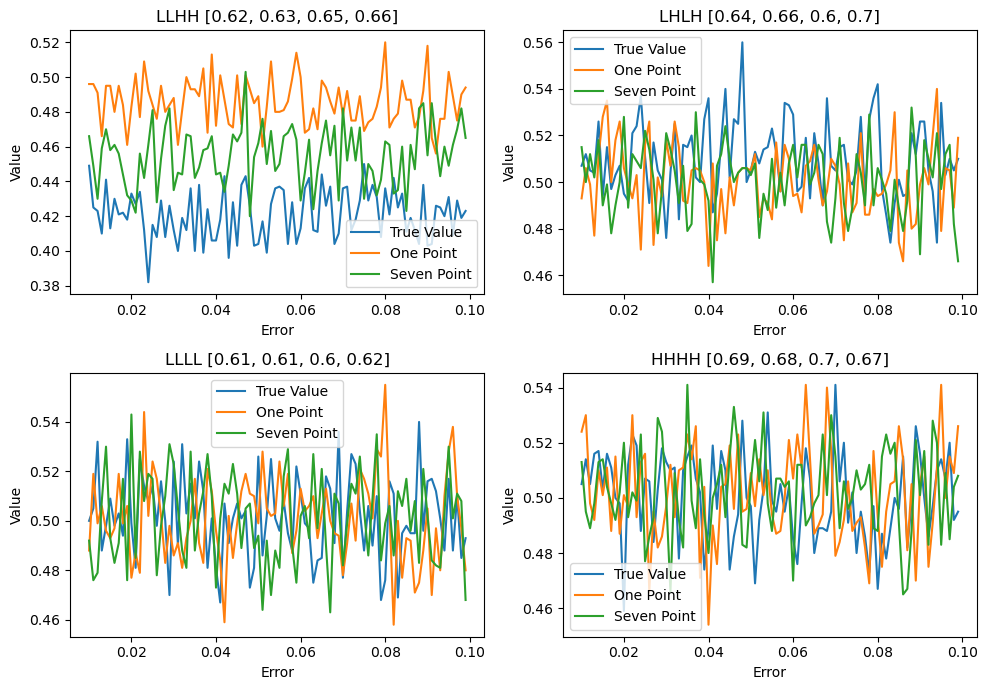

In [3]:
from simulation import simulate_full_match, simulate
lo_lo_hi_hi = [0.62, 0.63, 0.65, 0.66]
lo_hi_lo_hi = [0.64, 0.66, 0.6, 0.7]
lo_lo_lo_lo = [0.61, 0.61, 0.6, 0.62]
hi_hi_hi_hi = [0.69, 0.68, 0.7, 0.67]

errors = [error / 1000 for error in range(10, 100)]
true_values_llhh = []
one_point_llhh = []
seven_point_llhh = []

true_values_lhlh = []
one_point_lhlh = []
seven_point_lhlh = []

true_values_llll = []
one_point_llll = []
seven_point_llll = []

true_values_hhhh = []
one_point_hhhh = []
seven_point_hhhh = []

for err in errors:
    true_values_llhh.append(simulate_full_match(*lo_lo_hi_hi, error=err))
    one_point_llhh.append(simulate(*lo_lo_hi_hi, points_to_win=1, error=err))
    seven_point_llhh.append(simulate(*lo_lo_hi_hi, error=err))

    true_values_lhlh.append(simulate_full_match(*lo_hi_lo_hi, error=err))
    one_point_lhlh.append(simulate(*lo_hi_lo_hi, error=err, points_to_win=1))
    seven_point_lhlh.append(simulate(*lo_hi_lo_hi, error=err))

    true_values_llll.append(simulate_full_match(*lo_lo_lo_lo, error=err))
    one_point_llll.append(simulate(*lo_lo_lo_lo, error=err, points_to_win=1))
    seven_point_llll.append(simulate(*lo_lo_lo_lo, error=err))

    true_values_hhhh.append(simulate_full_match(*hi_hi_hi_hi, error=err))
    one_point_hhhh.append(simulate(*hi_hi_hi_hi, error=err, points_to_win=1))
    seven_point_hhhh.append(simulate(*hi_hi_hi_hi, error=err))
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.plot(errors, true_values_llhh, label='True Value')
plt.plot(errors, one_point_llhh, label='One Point')
plt.plot(errors, seven_point_llhh, label='Seven Point')
plt.title(f'LLHH {lo_lo_hi_hi}')
plt.xlabel('Error')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(errors, true_values_lhlh, label='True Value')
plt.plot(errors, one_point_lhlh, label='One Point')
plt.plot(errors, seven_point_lhlh, label='Seven Point')
plt.title(f'LHLH {lo_hi_lo_hi}')
plt.xlabel('Error')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(errors, true_values_llll, label='True Value')
plt.plot(errors, one_point_llll, label='One Point')
plt.plot(errors, seven_point_llll, label='Seven Point')
plt.title(f'LLLL {lo_lo_lo_lo}')
plt.xlabel('Error')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(errors, true_values_hhhh, label='True Value')
plt.plot(errors, one_point_hhhh, label='One Point')
plt.plot(errors, seven_point_hhhh, label='Seven Point')
plt.title(f'HHHH {hi_hi_hi_hi}')
plt.xlabel('Error')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

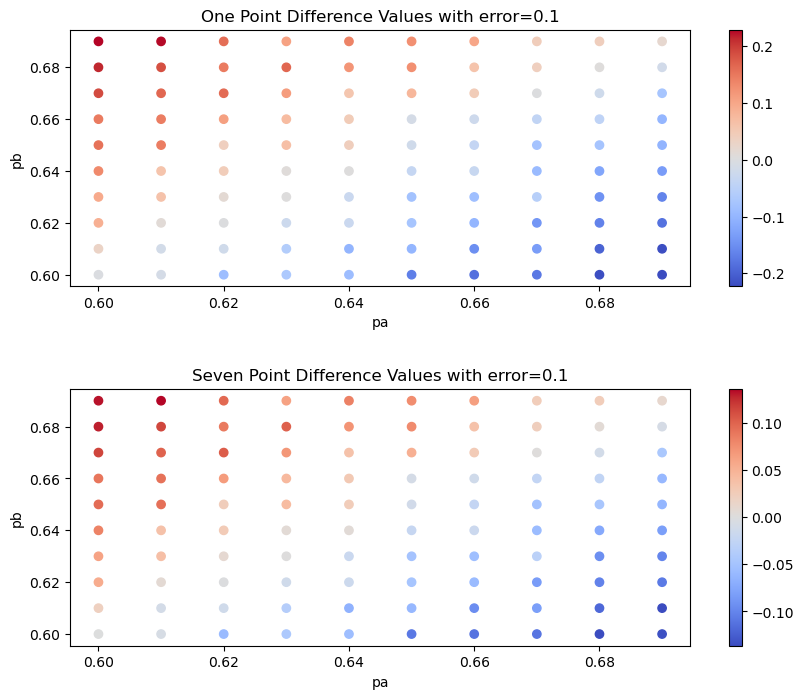

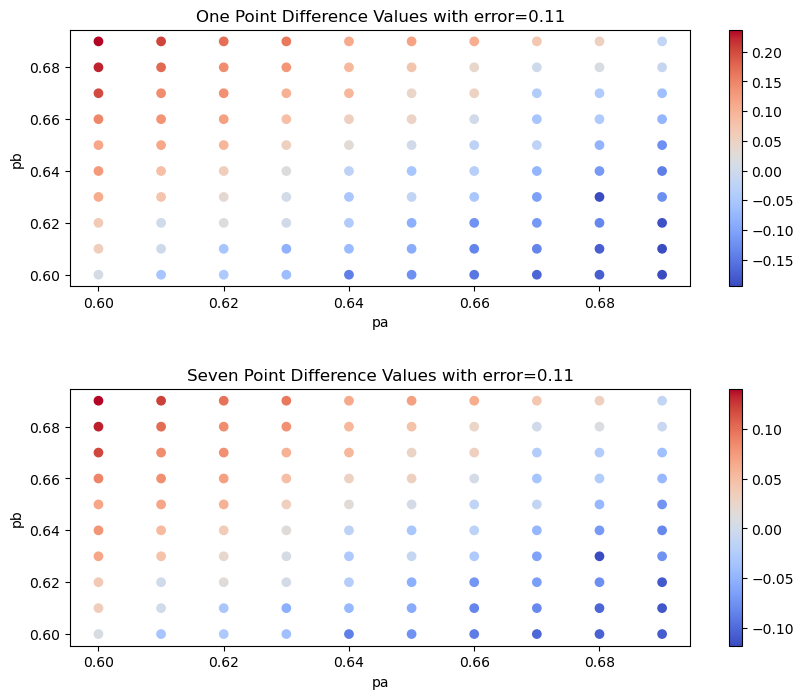

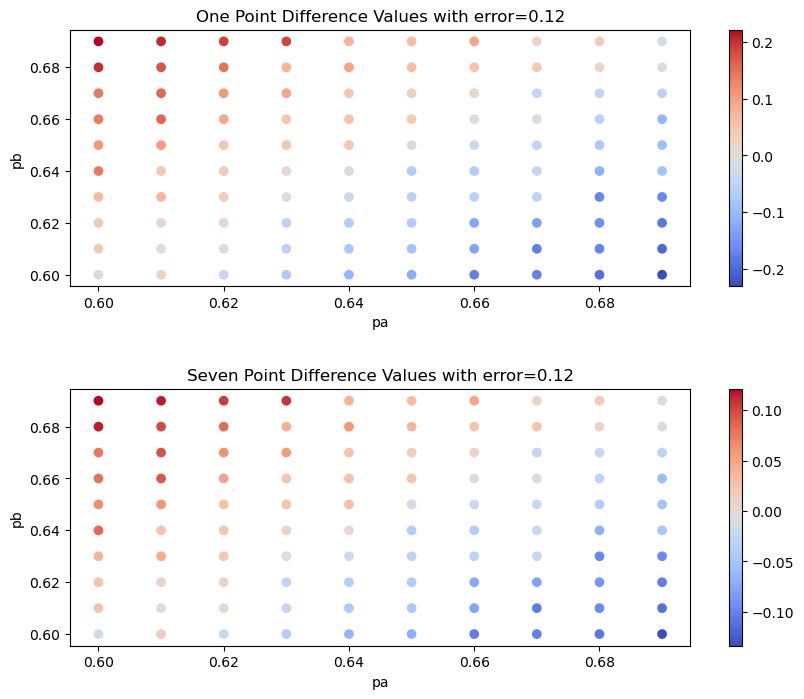

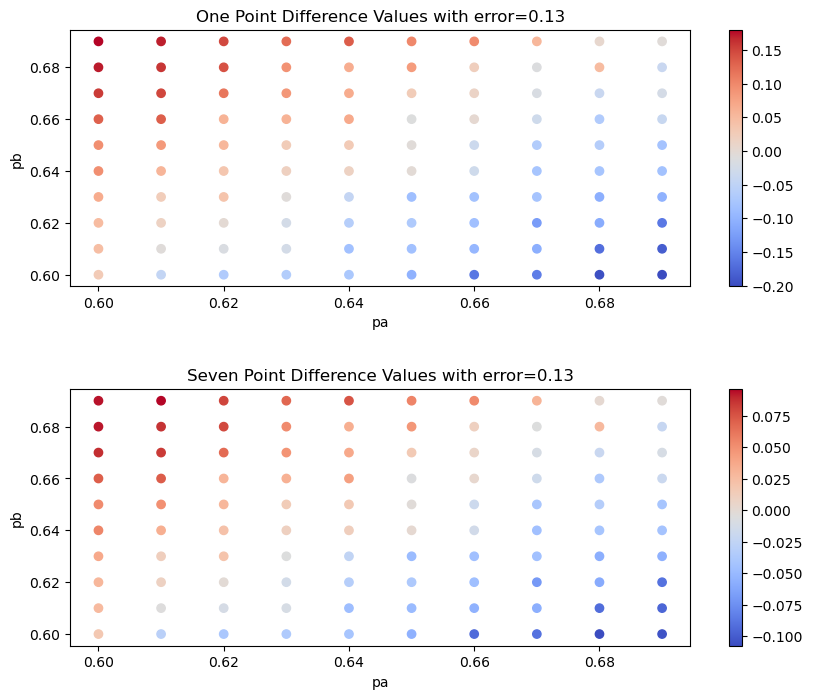

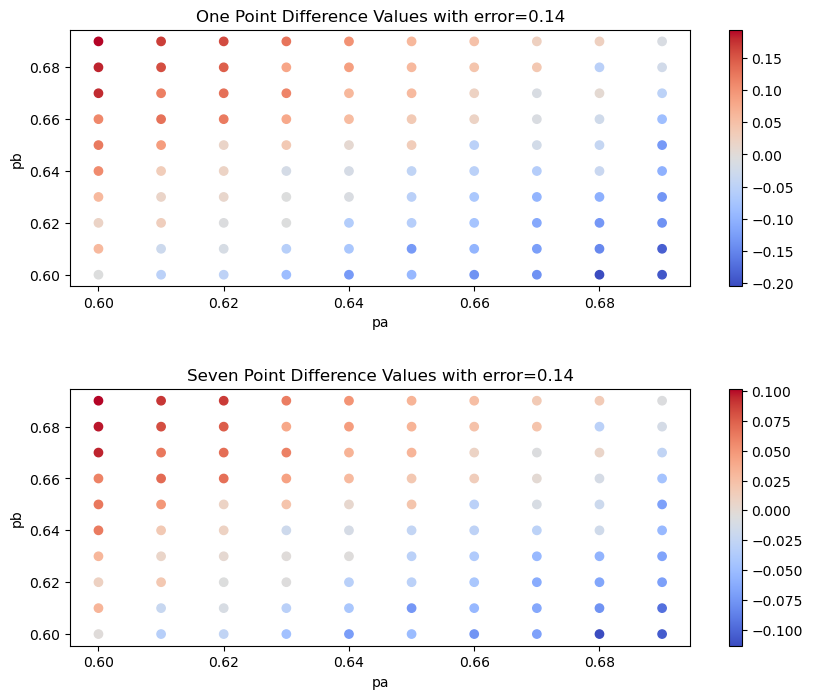

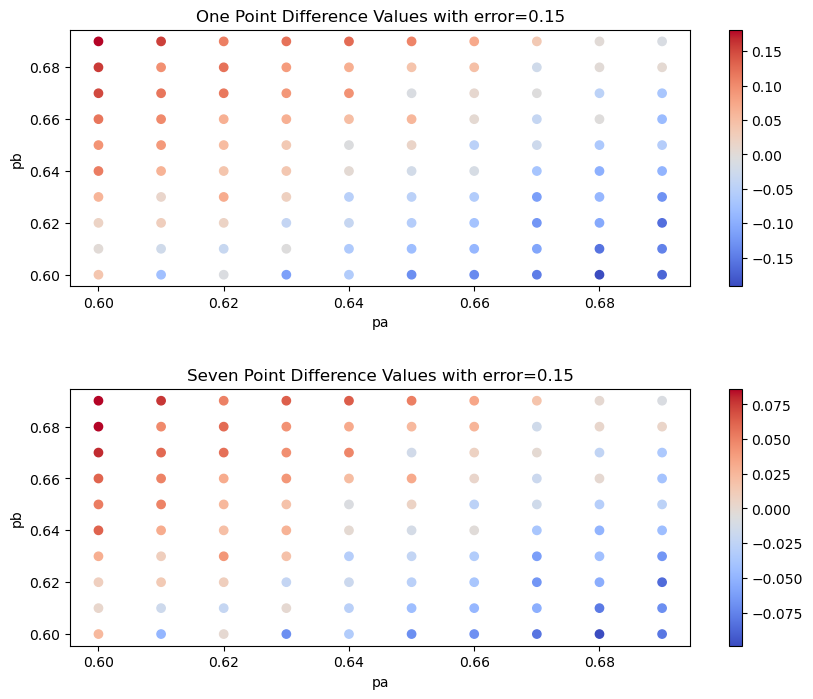

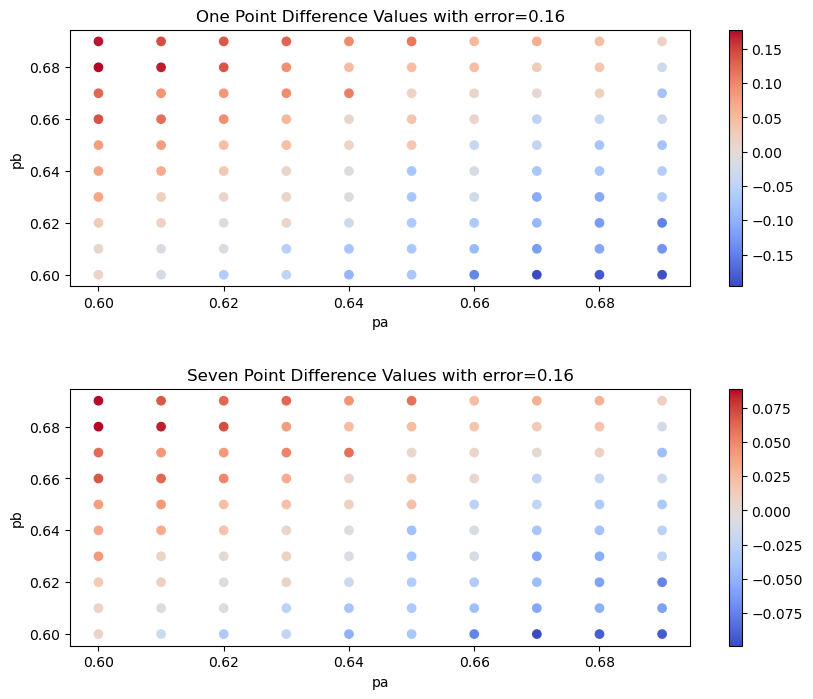

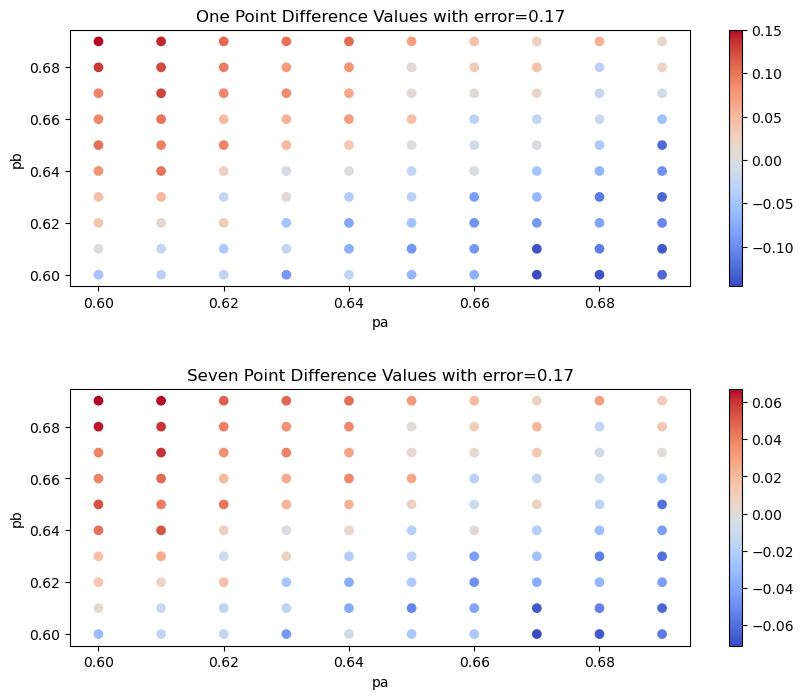

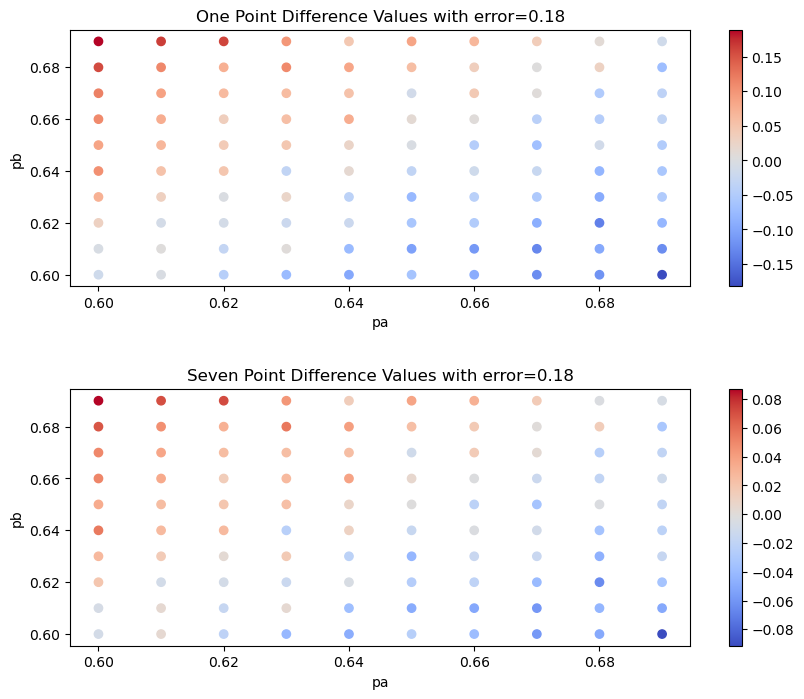

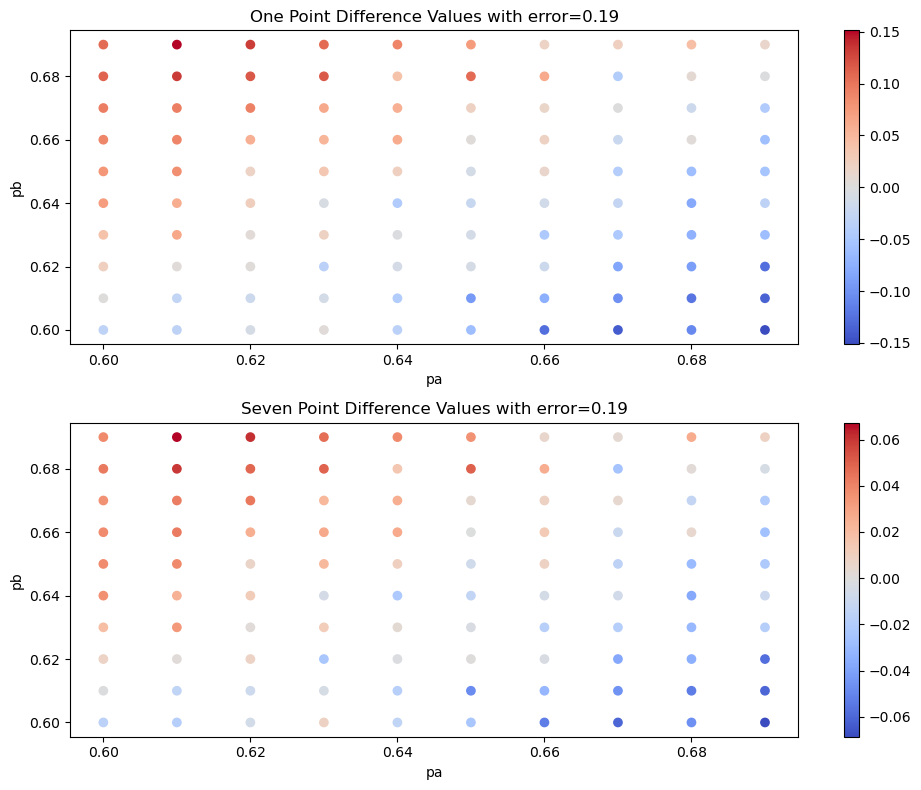

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from functools import cache
num_sets = 3

# tennis singles
def one_point_game(pa, pb):
    # probability A wins
    return 0.5 * pa + 0.5 * (1 - pb)

@cache
def tb(A_score, B_score, turn, PA, PB):
    if (A_score >= 7 and A_score - B_score >= 2) or (A_score >= 13):
        return 1
    elif (B_score >= 7 and B_score - A_score >= 2) or (B_score >= 13):
        return 0
    elif turn == 0:
        if (A_score + B_score + 1) % 2:
            turn = abs(turn - 1)
        return PA * tb(A_score + 1, B_score, turn, PA, PB) + (1 - PA) * tb(A_score, B_score + 1, turn, PA, PB)
    else:
        if (A_score + B_score + 1) % 2:
            turn = abs(turn - 1)
        return (1 - PB) * tb(A_score + 1, B_score, turn, PA, PB) + PB * tb(A_score, B_score + 1, turn, PA, PB)

@cache
def game(A_score, B_score, turn, PA, PB):
    if (A_score >= 4 and A_score - B_score >= 2) or A_score >= 6:
        return 1
    elif (B_score >= 4 and B_score - A_score >= 2) or B_score >= 6:
        return 0
    elif turn == 0:
        return PA * game(A_score + 1, B_score, turn, PA, PB) + (1 - PA) * game(A_score, B_score + 1, turn, PA, PB)
    else:
        return (1 - PB) * game(A_score + 1, B_score, turn, PA, PB) + PB * game(A_score, B_score + 1, turn, PA, PB)

@cache
def Set(A_game, B_game, turn, PA, PB, PA_tb):
    if (A_game >= 6 and A_game - B_game >= 2) or A_game >= 7:
        return 1
    elif (B_game >= 6 and B_game - A_game >= 2) or B_game >= 7:
        return 0
    else:
        PA_game = PA_tb if A_game == 6 and B_game == 6 else game(0, 0, turn, PA, PB)
        turn = abs(turn - 1)
        return PA_game * Set(A_game + 1, B_game, turn, PA, PB, PA_tb) + (1 - PA_game) * Set(A_game, B_game + 1, turn, PA, PB, PA_tb)

@cache
def Match(A_set, B_set, turn, PA, PB, PA_tb):
    if (A_set >= 2 and num_sets == 3) or (A_set >= 3 and num_sets == 5):
        return 1
    elif (B_set >= 2 and num_sets == 3) or (B_set >= 3 and num_sets == 5):
        return 0
    else:
        PA_set = Set(0, 0, turn, PA, PB, PA_tb)
        turn = abs(turn - 1)
        return PA_set * Match(A_set + 1, B_set, turn, PA, PB, PA_tb) + (1 - PA_set) * Match(A_set, B_set + 1, turn, PA, PB, PA_tb)

@cache
def simulate_match(pa, pb, e):
    one_point_diff_values = []
    seven_point_diff_values = []

    for _ in range(200):
        PA = pa + random.uniform(-e, e)
        PB = pb + random.uniform(-e, e)

        tb_pred = np.mean([tb(0, 0, 0, PA, PB), tb(0, 0, 1, PA, PB)])
        one_point_pred = one_point_game(PA, PB)
        gt = np.mean([Match(0, 0, 0, PA, PB, tb_pred), Match(0, 0, 1, PA, PB, tb_pred)])

        one_point_diff_values.append(one_point_pred - gt)
        seven_point_diff_values.append(tb_pred - gt)

    return np.mean(one_point_diff_values), np.mean(seven_point_diff_values)

# Loop through error values
for error in range(1, 15):
    err = error / 100

    # Initialize lists to store results
    pa_values = []
    pb_values = []
    one_point_diff_values = []
    seven_point_diff_values = []

    for a in range(60, 70):
        for b in range(60, 70):
            pa = a / 100
            pb = b / 100

            pa_values.append(pa)
            pb_values.append(pb)
            
            one_point_diff, seven_point_diff = simulate_match(pa, pb, err)

            one_point_diff_values.append(one_point_diff)
            seven_point_diff_values.append(seven_point_diff)

    # Create a figure for the plot
    fig, ax = plt.subplots(2, figsize=(10, 8))

    # Plot the data points for One Point difference values
    sc = ax[0].scatter(pa_values, pb_values, c=one_point_diff_values, cmap='coolwarm')
    ax[0].set_title(f'One Point Difference Values with error={err}')
    ax[0].set_xlabel('pa')
    ax[0].set_ylabel('pb')
    fig.colorbar(sc, ax=ax[0])

    # Plot the data points for Seven Point difference values
    sc = ax[1].scatter(pa_values, pb_values, c=seven_point_diff_values, cmap='coolwarm')
    ax[1].set_title(f'Seven Point Difference Values with error={err}')
    ax[1].set_xlabel('pa')
    ax[1].set_ylabel('pb')
    fig.colorbar(sc, ax=ax[1])

    # Adjust the spacing between subplots
    plt.subplots_adjust(hspace=0.4)

plt.tight_layout()
plt.show()
